<a href="https://colab.research.google.com/github/Awsemous/Projects/blob/main/StockPredictorISTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

stock_data = yf.download('NFLX', start='2018-01-02', end='2022-07-08')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,196.100006,201.649994,195.419998,201.070007,201.070007,10966900
2018-01-03,202.050003,206.210007,201.500000,205.050003,205.050003,8591400
2018-01-04,206.199997,207.050003,204.000000,205.630005,205.630005,6029600
2018-01-05,207.250000,210.020004,205.589996,209.990005,209.990005,7033200
2018-01-08,210.020004,212.500000,208.440002,212.050003,212.050003,5580200


In [ ]:
stock_data2 = yf.download('TSLA', start='2018-01-02', end='2022-07-08')
stock_data2.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [ ]:
stock_data3 = yf.download('GOOG', start='2018-01-02', end='2022-07-08')
stock_data3.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,52.417000,53.347000,52.261501,53.250000,53.250000,24752000
2018-01-03,53.215500,54.314499,53.160500,54.124001,54.124001,28604000
2018-01-04,54.400002,54.678501,54.200100,54.320000,54.320000,20092000
2018-01-05,54.700001,55.212502,54.599998,55.111500,55.111500,25582000
2018-01-08,55.111500,55.563499,55.081001,55.347000,55.347000,20952000


In [ ]:
stock_data4 = yf.download('MSFT', start='2018-01-02', end='2022-07-08')
stock_data4.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,86.129997,86.309998,85.500000,85.949997,80.940384,22483800
2018-01-03,86.059998,86.510002,85.970001,86.349998,81.317070,26061400
2018-01-04,86.589996,87.660004,86.570000,87.110001,82.032776,21912000
2018-01-05,87.660004,88.410004,87.430000,88.190002,83.049835,23407100
2018-01-08,88.199997,88.580002,87.599998,88.279999,83.134583,22113000


In [ ]:
stock_data5 = yf.download('AMZN', start='2018-01-02', end='2022-07-08')
stock_data5.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000


Text(0, 0.5, 'Prices ($)')

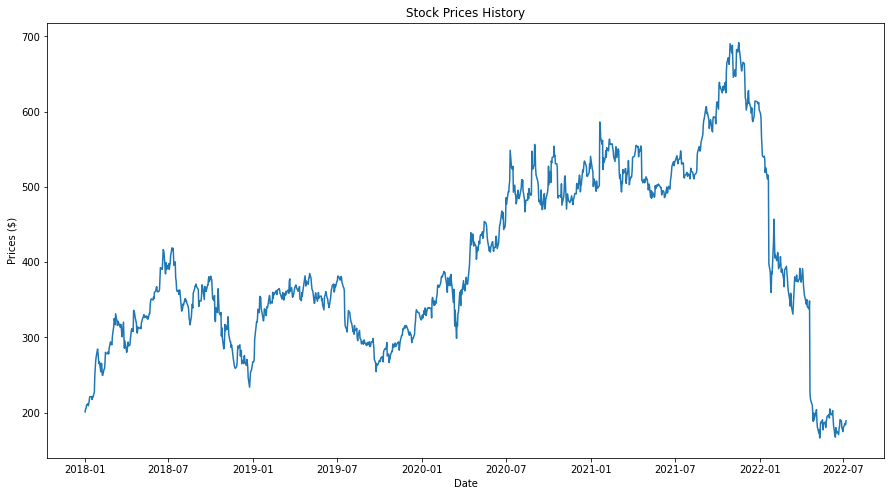

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

Text(0, 0.5, 'Prices ($)')

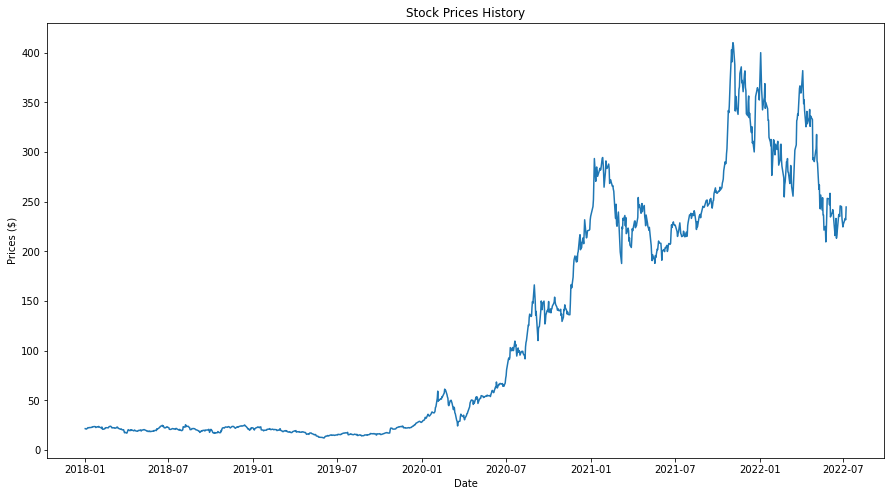

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data2['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

Text(0, 0.5, 'Prices ($)')

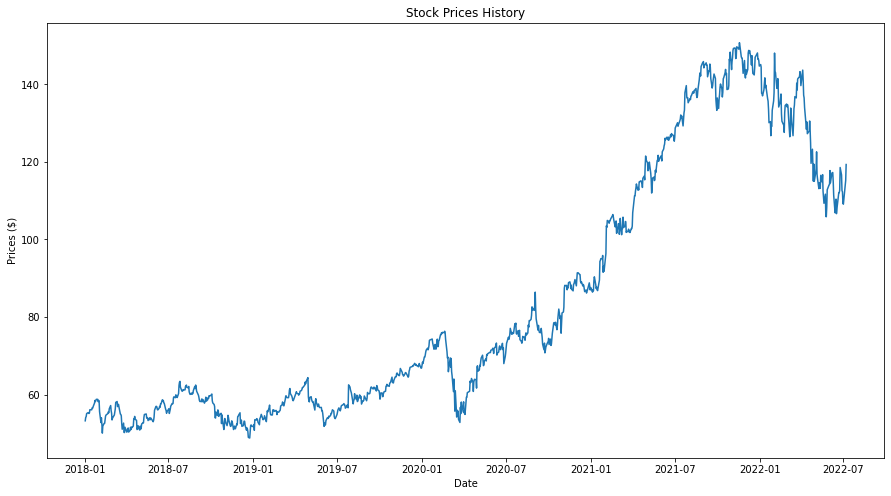

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data3['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

Text(0, 0.5, 'Prices ($)')

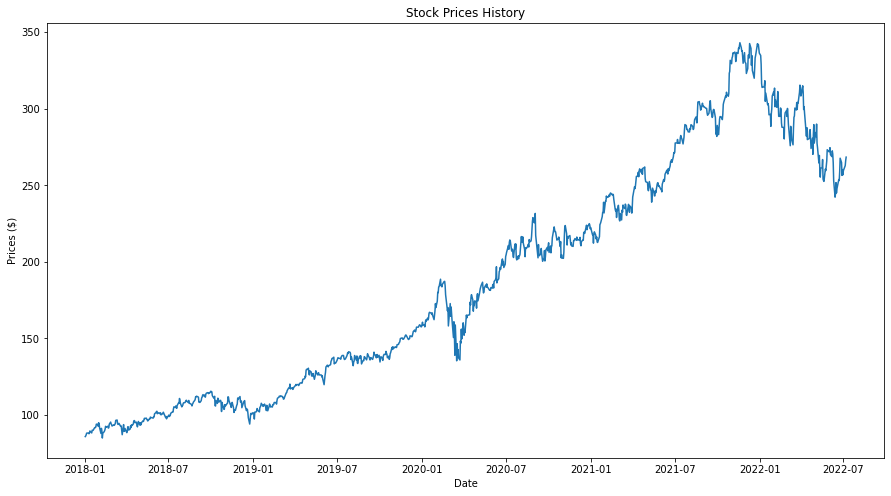

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data4['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

Text(0, 0.5, 'Prices ($)')

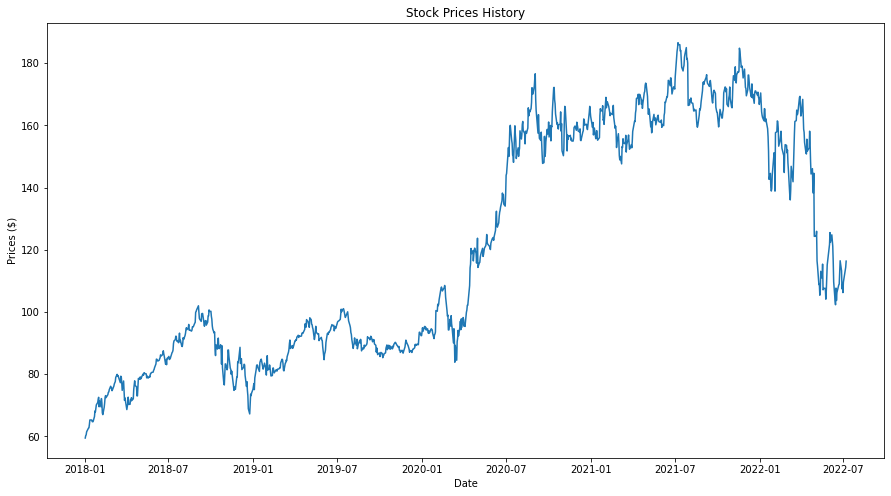

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data5['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [ ]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
close_prices2 = stock_data2['Close']
values2 = close_prices2.values
training_data_len2 = math.ceil(len(values2)* 0.8)

scaler2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler2.fit_transform(values.reshape(-1,1))
train_data2 = scaled_data2[0: training_data_len2, :]

x_train2 = []
y_train2 = []

for i in range(60, len(train_data2)):
    x_train2.append(train_data2[i-60:i, 0])
    y_train2.append(train_data2[i, 0])

x_train2, y_train2 = np.array(x_train2), np.array(y_train2)
x_train2 = np.reshape(x_train, (x_train2.shape[0], x_train2.shape[1], 1))

In [ ]:
close_prices3 = stock_data3['Close']
values3 = close_prices3.values
training_data_len3 = math.ceil(len(values3)* 0.8)

scaler3 = MinMaxScaler(feature_range=(0,1))
scaled_data3 = scaler3.fit_transform(values.reshape(-1,1))
train_data3 = scaled_data3[0: training_data_len3, :]

x_train3 = []
y_train3 = []

for i in range(60, len(train_data3)):
    x_train3.append(train_data3[i-60:i, 0])
    y_train3.append(train_data3[i, 0])

x_train3, y_train3 = np.array(x_train3), np.array(y_train3)
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))

In [ ]:
close_prices4 = stock_data4['Close']
values4 = close_prices4.values
training_data_len4 = math.ceil(len(values4)* 0.8)

scaler4 = MinMaxScaler(feature_range=(0,1))
scaled_data4 = scaler4.fit_transform(values.reshape(-1,1))
train_data4 = scaled_data4[0: training_data_len4, :]

x_train4 = []
y_train4 = []

for i in range(60, len(train_data4)):
    x_train4.append(train_data4[i-60:i, 0])
    y_train4.append(train_data4[i, 0])

x_train4, y_train4 = np.array(x_train4), np.array(y_train4)
x_train4 = np.reshape(x_train4, (x_train4.shape[0], x_train4.shape[1], 1))

In [ ]:
close_prices5 = stock_data5['Close']
values5 = close_prices5.values
training_data_len5 = math.ceil(len(values5)* 0.8)

scaler5 = MinMaxScaler(feature_range=(0,1))
scaled_data5 = scaler5.fit_transform(values.reshape(-1,1))
train_data5 = scaled_data5[0: training_data_len5, :]

x_train5 = []
y_train5 = []

for i in range(60, len(train_data5)):
    x_train5.append(train_data5[i-60:i, 0])
    y_train5.append(train_data5[i, 0])

x_train5, y_train5 = np.array(x_train5), np.array(y_train5)
x_train5 = np.reshape(x_train5, (x_train5.shape[0], x_train5.shape[1], 1))

In [ ]:
model1 = keras.Sequential()
model1.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model1.add(layers.LSTM(100, return_sequences=False))
model1.add(layers.Dense(25))
model1.add(layers.Dense(1))
model1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_31 (LSTM)              (None, 100)               80400     
                                                                 
 dense_30 (Dense)            (None, 25)                2525      
                                                                 
 dense_31 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2 = keras.Sequential()
model2.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model2.add(layers.LSTM(100, return_sequences=False))
model2.add(layers.Dense(25))
model2.add(layers.Dense(1))
model2.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_43 (LSTM)              (None, 100)               80400     
                                                                 
 dense_42 (Dense)            (None, 25)                2525      
                                                                 
 dense_43 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3 = keras.Sequential()
model3.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train3.shape[1], 1)))
model3.add(layers.LSTM(100, return_sequences=False))
model3.add(layers.Dense(25))
model3.add(layers.Dense(1))
model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_37 (LSTM)              (None, 100)               80400     
                                                                 
 dense_36 (Dense)            (None, 25)                2525      
                                                                 
 dense_37 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4 = keras.Sequential()
model4.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train4.shape[1], 1)))
model4.add(layers.LSTM(100, return_sequences=False))
model4.add(layers.Dense(25))
model4.add(layers.Dense(1))
model4.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_45 (LSTM)              (None, 100)               80400     
                                                                 
 dense_44 (Dense)            (None, 25)                2525      
                                                                 
 dense_45 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5 = keras.Sequential()
model5.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train5.shape[1], 1)))
model5.add(layers.LSTM(100, return_sequences=False))
model5.add(layers.Dense(25))
model5.add(layers.Dense(1))
model5.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_41 (LSTM)              (None, 100)               80400     
                                                                 
 dense_40 (Dense)            (None, 25)                2525      
                                                                 
 dense_41 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam', loss='mean_squared_error')
model1.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
849/849 [==============================] - 36s 34ms/step - loss: 0.0036
Epoch 2/3
849/849 [==============================] - 28s 33ms/step - loss: 0.0013
Epoch 3/3
849/849 [==============================] - 31s 36ms/step - loss: 9.6976e-04


In [ ]:
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(x_train2, y_train2, batch_size= 1, epochs=3)

Epoch 1/3
849/849 [==============================] - 31s 33ms/step - loss: 0.0030
Epoch 2/3
849/849 [==============================] - 28s 33ms/step - loss: 0.0013
Epoch 3/3
849/849 [==============================] - 29s 34ms/step - loss: 8.6324e-04


In [ ]:
model3.compile(optimizer='adam', loss='mean_squared_error')
model3.fit(x_train3, y_train3, batch_size= 1, epochs=3)

Epoch 1/3
849/849 [==============================] - 31s 33ms/step - loss: 0.0027
Epoch 2/3
849/849 [==============================] - 29s 34ms/step - loss: 0.0011
Epoch 3/3
849/849 [==============================] - 28s 33ms/step - loss: 8.1516e-04


In [ ]:
model4.compile(optimizer='adam', loss='mean_squared_error')
model4.fit(x_train4, y_train4, batch_size= 1, epochs=3)

Epoch 1/3
849/849 [==============================] - 31s 33ms/step - loss: 0.0029
Epoch 2/3
849/849 [==============================] - 28s 33ms/step - loss: 0.0012
Epoch 3/3
849/849 [==============================] - 27s 32ms/step - loss: 8.9500e-04


In [ ]:
model5.compile(optimizer='adam', loss='mean_squared_error')
model5.fit(x_train5, y_train5, batch_size= 1, epochs=3)

Epoch 1/3
849/849 [==============================] - 33s 35ms/step - loss: 0.0028
Epoch 2/3
849/849 [==============================] - 30s 36ms/step - loss: 0.0011
Epoch 3/3
849/849 [==============================] - 34s 40ms/step - loss: 9.0901e-04


In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
test_data2 = scaled_data2[training_data_len2-60: , : ]
x_test2 = []
y_test2 = values[training_data_len2:]

for i in range(60, len(test_data2)):
  x_test2.append(test_data2[i-60:i, 0])

x_test2 = np.array(x_test2)
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1))

In [ ]:
test_data3 = scaled_data3[training_data_len3-60: , : ]
x_test3 = []
y_test3 = values[training_data_len3:]

for i in range(60, len(test_data3)):
  x_test3.append(test_data3[i-60:i, 0])

x_test3 = np.array(x_test3)
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1))

In [ ]:
test_data4 = scaled_data4[training_data_len4-60: , : ]
x_test4 = []
y_test4 = values[training_data_len4:]

for i in range(60, len(test_data4)):
  x_test4.append(test_data4[i-60:i, 0])

x_test4 = np.array(x_test4)
x_test4 = np.reshape(x_test4, (x_test4.shape[0], x_test4.shape[1], 1))

In [ ]:
test_data5 = scaled_data5[training_data_len5-60: , : ]
x_test5 = []
y_test5 = values[training_data_len5:]

for i in range(60, len(test_data5)):
  x_test5.append(test_data5[i-60:i, 0])

x_test5 = np.array(x_test5)
x_test5 = np.reshape(x_test5, (x_test5.shape[0], x_test5.shape[1], 1))

In [ ]:
predictions1 = model1.predict(x_test)
predictions1 = scaler.inverse_transform(predictions1)
rmse1 = np.sqrt(np.mean(predictions1 - y_test)**2)
rmse1

8/8 [==============================] - 2s 62ms/step


215.56258940171566

In [ ]:
predictions2 = model2.predict(x_test2)
predictions2 = scaler2.inverse_transform(predictions2)
rmse2 = np.sqrt(np.mean(predictions2 - y_test2)**2)
rmse2

8/8 [==============================] - 0s 28ms/step


3.3558004774186054

In [ ]:
predictions3 = model3.predict(x_test3)
predictions3 = scaler3.inverse_transform(predictions3)
rmse3 = np.sqrt(np.mean(predictions3 - y_test3)**2)
rmse3

8/8 [==============================] - 1s 30ms/step


311.1957205213639

In [ ]:
predictions4 = model4.predict(x_test4)
predictions4 = scaler4.inverse_transform(predictions4)
rmse4 = np.sqrt(np.mean(predictions4 - y_test4)**2)
rmse4

8/8 [==============================] - 1s 30ms/step


259.24567954445723

In [ ]:
predictions5 = model5.predict(x_test5)
predictions5 = scaler5.inverse_transform(predictions5)
rmse5 = np.sqrt(np.mean(predictions5 - y_test)**2)
rmse5


8/8 [==============================] - 0s 30ms/step


272.1601018023386

<ipython-input-208-98f299df2f36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions1'] = predictions1


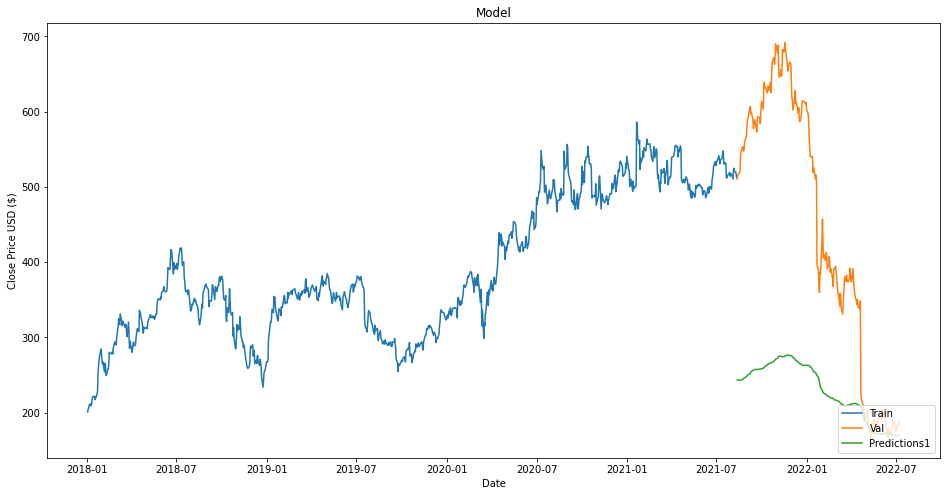

In [ ]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions1'] = predictions1
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions1']])
plt.legend(['Train', 'Val', 'Predictions1'], loc='lower right')
plt.show()

<ipython-input-207-bd131e3f39f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation2['Predictions2'] = predictions2


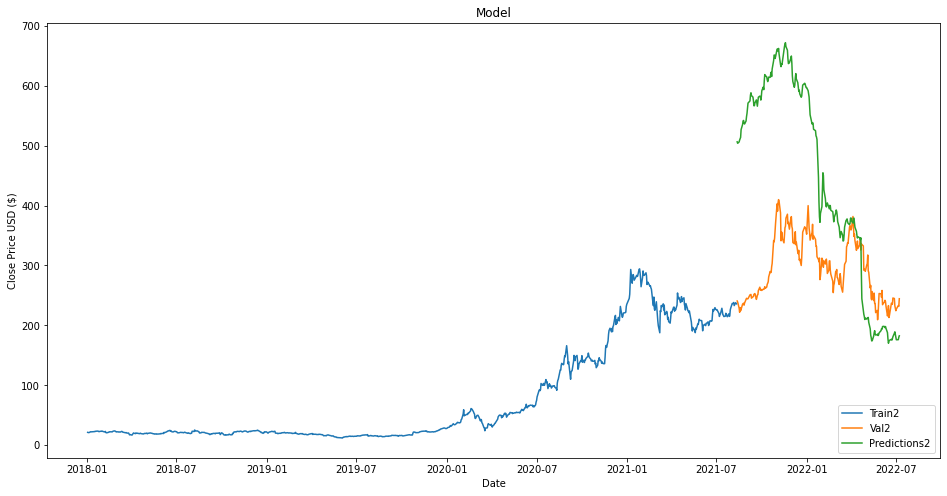

In [ ]:
data2 = stock_data2.filter(['Close'])
train2 = data2[:training_data_len2]
validation2 = data2[training_data_len2:]
validation2['Predictions2'] = predictions2
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train2)
plt.plot(validation2[['Close', 'Predictions2']])
plt.legend(['Train2', 'Val2', 'Predictions2'], loc='lower right')
plt.show()

<ipython-input-206-d4a1bc359f33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation3['Predictions3'] = predictions3


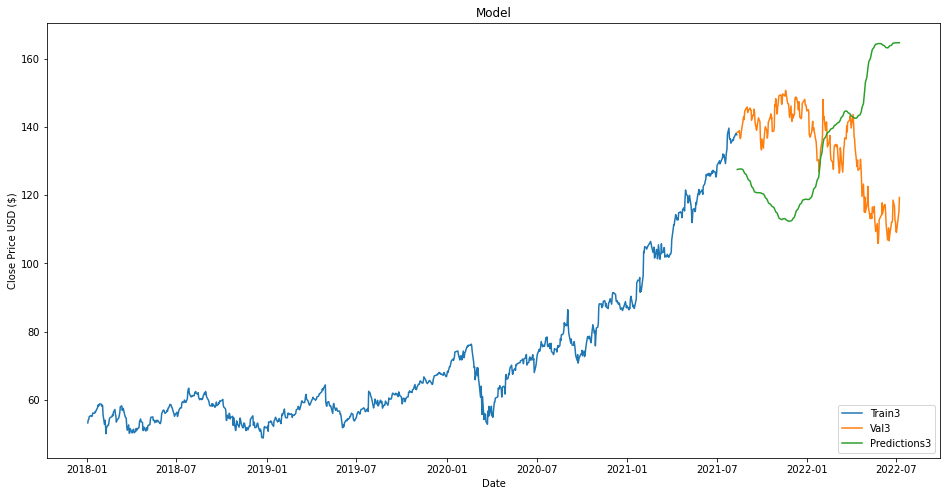

In [ ]:
data3 = stock_data3.filter(['Close'])
train3 = data3[:training_data_len3]
validation3 = data3[training_data_len3:]
validation3['Predictions3'] = predictions3
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train3)
plt.plot(validation3[['Close', 'Predictions3']])
plt.legend(['Train3', 'Val3', 'Predictions3'], loc='lower right')
plt.show()

<ipython-input-205-78c0aa5713cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation4['Predictions4'] = predictions4


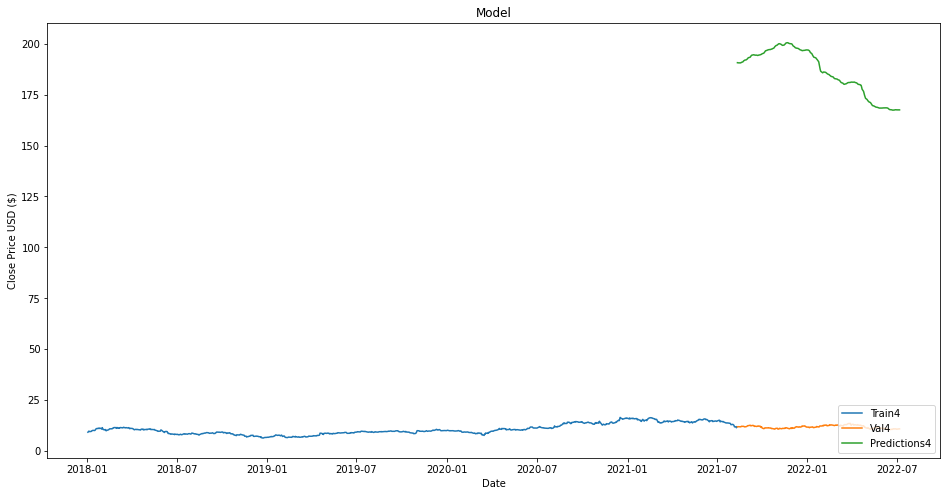

In [ ]:
data4 = stock_data4.filter(['Close'])
train4 = data4[:training_data_len4]
validation4 = data4[training_data_len4:]
validation4['Predictions4'] = predictions4
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train4)
plt.plot(validation4[['Close', 'Predictions4']])
plt.legend(['Train4', 'Val4', 'Predictions4'], loc='lower right')
plt.show()

<ipython-input-204-42775d9cf0c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation5['Predictions5'] = predictions5


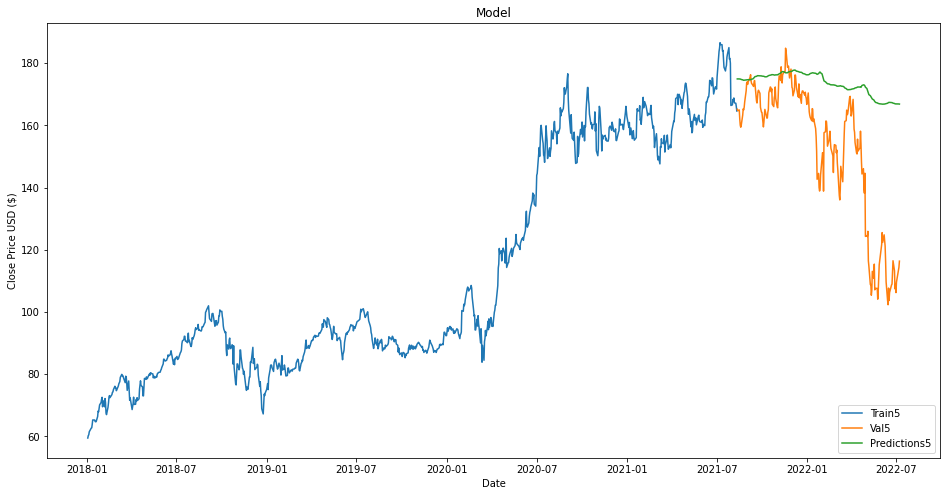

In [ ]:
data5 = stock_data5.filter(['Close'])
train5 = data5[:training_data_len5]
validation5 = data5[training_data_len5:]
validation5['Predictions5'] = predictions5
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train5)
plt.plot(validation5[['Close', 'Predictions5']])
plt.legend(['Train5', 'Val5', 'Predictions5'], loc='lower right')
plt.show()

In [ ]:
validation.head()

,Close,Predictions1
Date,,
2021-08-12,510.720001,243.480133
2021-08-13,515.919983,243.334030
2021-08-16,517.919983,243.230896
2021-08-17,518.909973,243.177902
2021-08-18,521.869995,243.167450


In [ ]:
validation2.head()

,Close,Predictions2
Date,,
2021-08-12,240.750000,506.457001
2021-08-13,239.056671,503.954803
2021-08-16,228.723328,506.274719
2021-08-17,221.903336,509.387573
2021-08-18,229.663330,511.507599


In [ ]:
validation3.head()

,Close,Predictions3
Date,,
2021-08-12,138.389496,127.516197
2021-08-13,138.406006,127.558678
2021-08-16,138.916000,127.610283
2021-08-17,137.300507,127.655754
2021-08-18,136.570007,127.686508


In [ ]:
validation4.head()

,Close,Predictions4
Date,,
2021-08-12,11.800,190.742706
2021-08-13,11.886,190.671631
2021-08-16,11.870,190.635986
2021-08-17,11.834,190.630539
2021-08-18,11.806,190.644150


In [ ]:
validation5.head()

,Close,Predictions5
Date,,
2021-08-12,165.175003,174.911423
2021-08-13,164.698502,174.928375
2021-08-16,164.949493,174.922668
2021-08-17,162.098007,174.900970
2021-08-18,160.061005,174.872971


In [ ]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,196.100006,201.649994,195.419998,201.070007,201.070007,10966900
2018-01-03,202.050003,206.210007,201.500000,205.050003,205.050003,8591400
2018-01-04,206.199997,207.050003,204.000000,205.630005,205.630005,6029600
2018-01-05,207.250000,210.020004,205.589996,209.990005,209.990005,7033200
2018-01-08,210.020004,212.500000,208.440002,212.050003,212.050003,5580200


In [ ]:
stock_data2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [ ]:
stock_data3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,52.417000,53.347000,52.261501,53.250000,53.250000,24752000
2018-01-03,53.215500,54.314499,53.160500,54.124001,54.124001,28604000
2018-01-04,54.400002,54.678501,54.200100,54.320000,54.320000,20092000
2018-01-05,54.700001,55.212502,54.599998,55.111500,55.111500,25582000
2018-01-08,55.111500,55.563499,55.081001,55.347000,55.347000,20952000


In [ ]:
stock_data4.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,9.042,9.190,9.042,9.180,9.180,1516000
2018-01-03,9.170,9.390,9.170,9.388,9.388,1896000
2018-01-04,9.638,9.710,9.580,9.708,9.708,1677000
2018-01-05,9.440,9.486,9.362,9.486,9.486,1472000
2018-01-08,9.530,9.530,9.432,9.514,9.514,753500


In [ ]:
stock_data5.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,45.599998,45.599998,45.599998,45.599998,-8.073650e+19,0
2018-01-03,45.599998,45.599998,45.599998,45.599998,-8.073650e+19,0
2018-01-04,45.599998,45.599998,45.599998,45.599998,-8.073650e+19,0
2018-01-05,45.599998,45.599998,45.599998,45.599998,-8.073650e+19,0
2018-01-08,45.599998,45.599998,45.599998,45.599998,-8.073650e+19,0


In [ ]:
import pandas as pd
twitter_data = pd.read_csv('twitter_netflix.csv')
twitter_data.head()

FileNotFoundError: ignored

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(twitter_data['Close'])
plt.xlabel('date')
plt.ylabel('Prices ($)')

In [ ]:
close_prices = twitter_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

In [ ]:
data = twitter_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
validation.head(100)

In [ ]:
sent1_data = pd.read_csv("sent1.csv", index_col=0)
sent1_data.head()

,Open,High,Low,Close,Adj Close,Volume,P_mean,P_sum,twt_count
date,,,,,,,,,
2018-01-02,196.100006,201.649994,195.419998,201.070007,201.070007,10966900,0.020833,10,480
2018-01-03,202.050003,206.210007,201.500000,205.050003,205.050003,8591400,0.071217,24,337
2018-01-04,206.199997,207.050003,204.000000,205.630005,205.630005,6029600,-0.018519,-4,216
2018-01-05,207.250000,210.020004,205.589996,209.990005,209.990005,7033200,-0.019737,-6,304
2018-01-08,210.020004,212.500000,208.440002,212.050003,212.050003,5580200,-0.007663,-2,261


Text(0, 0.5, 'Prices ($)')

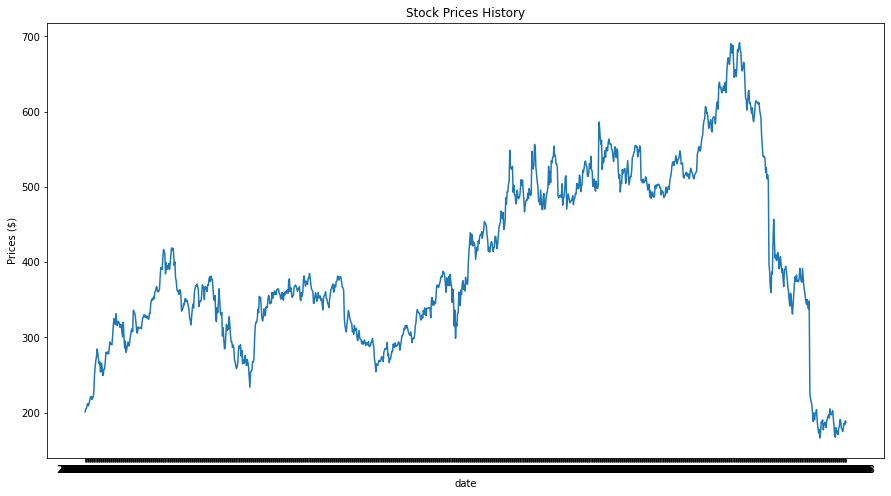

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(sent1_data['Close'])
plt.xlabel('date')
plt.ylabel('Prices ($)')

In [ ]:
close_prices = sent1_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
sent_model1 = keras.Sequential()
sent_model1.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
sent_model1.add(layers.LSTM(100, return_sequences=False))
sent_model1.add(layers.Dense(25))
sent_model1.add(layers.Dense(1))
sent_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sent_model1.compile(optimizer='adam', loss='mean_squared_error')
sent_model1.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
850/850 [==============================] - 37s 39ms/step - loss: 0.0036
Epoch 2/3
850/850 [==============================] - 45s 53ms/step - loss: 0.0013
Epoch 3/3
850/850 [==============================] - 37s 43ms/step - loss: 9.3817e-04


In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions1 = sent_model1.predict(x_test)
predictions1 = scaler.inverse_transform(predictions1)
rmse1 = np.sqrt(np.mean(predictions1 - y_test)**2)
rmse1

8/8 [==============================] - 1s 32ms/step


3.19840895494045

<ipython-input-21-64ecd2529d6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions1'] = predictions1


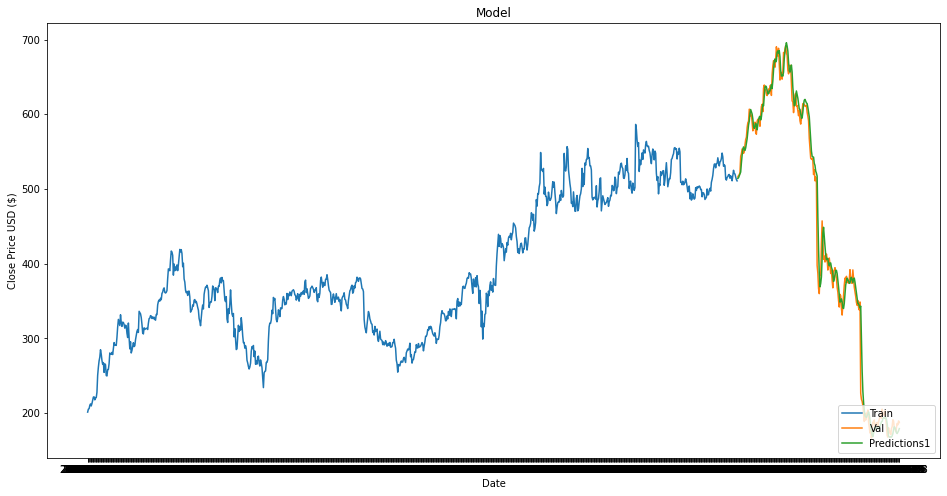

In [ ]:
data = sent1_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions1'] = predictions1
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions1']])
plt.legend(['Train', 'Val', 'Predictions1'], loc='lower right')
plt.show()

In [ ]:
validation.head(20)

,Close,Predictions1
date,,
2021-08-13,515.919983,513.975098
2021-08-16,517.919983,514.954407
2021-08-17,518.909973,517.491211
2021-08-18,521.869995,519.839111
2021-08-19,543.710022,522.555054
2021-08-20,546.880005,534.763733
2021-08-23,553.330017,544.891724
2021-08-24,553.409973,552.870972
2021-08-25,547.580017,556.194214


In [ ]:
NFLXEarning = yf.Ticker("NFLX")
NFLXEarning.earnings

,Revenue,Earnings
Year,,
2018,15794341000,1211242000
2019,20156447000,1866916000
2020,24996056000,2761395000
2021,29697844000,5116228000


In [ ]:
TSLAEarning = yf.Ticker("TSLA")
TSLAEarning.earnings

,Revenue,Earnings
Year,,
2018,21461000000,-976000000
2019,24578000000,-862000000
2020,31536000000,721000000
2021,53823000000,5519000000


In [ ]:
GOOGEarnings = yf.Ticker("GOOG")
GOOGEarnings.earnings

,Revenue,Earnings
Year,,
2018,136819000000,30736000000
2019,161857000000,34343000000
2020,182527000000,40269000000
2021,257637000000,76033000000


In [ ]:
NTDOYEarnings = yf.Ticker("NTDOY")
NTDOYEarnings.earnings

,Revenue,Earnings
Year,,
2019,1200560000000,194009000000
2020,1308519000000,258641000000
2021,1758910000000,480376000000
2022,1695344000000,477691000000


In [ ]:
AMZNEarnings = yf.Ticker("AMZN")
AMZNEarnings.earnings

,Revenue,Earnings
Year,,
2018,232887000000,10073000000
2019,280522000000,11588000000
2020,386064000000,21331000000
2021,469822000000,33364000000


In [ ]:
twitter_data = pd.read_csv("Tweet.csv", index_col=0)
twitter_data.head()

,writer,post_date,body,comment_num,retweet_num,like_num
tweet_id,,,,,,
550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
